---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Distributions in Pandas

In [1]:
import pandas as pd
import numpy as np

In [4]:
# np.random.binomial(1, 0.5)
np.random.binomial(1,0.5)

1

In [7]:
# np.random.binomial(1000, 0.5)/1000
np.random.binomial(100,0.5)/100

0.5

In [8]:
chance_of_tornado = 0.01/100
np.random.binomial(100000, chance_of_tornado)

10

In [9]:
# chance_of_tornado = 0.01

# tornado_events = np.random.binomial(1, chance_of_tornado, 1000000)
    
# two_days_in_a_row = 0
# for j in range(1,len(tornado_events)-1):
#     if tornado_events[j]==1 and tornado_events[j-1]==1:
#         two_days_in_a_row+=1

# print('{} tornadoes back to back in {} years'.format(two_days_in_a_row, 1000000/365))

chance =0.01
tornado = np.random.binomial(1,chance,1000000)
two=0
for j in range(1,len(tornado)-1):
    if tornado[j]==1 and tornado[j-1]==1:
        two+=1
print('{} tornadoes back to back in {} years'.format(two,1000000/365))        
        

119 tornadoes back to back in 2739.72602739726 years


In [16]:
np.random.uniform(0, 1)

0.3214378763354516

In [21]:
np.random.normal(0.75)

0.6831825448196216

Formula for standard deviation
$$\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}$$

In [22]:
distribution = np.random.normal(0.75,size=1000)

np.sqrt(np.sum((np.mean(distribution)-distribution)**2)/len(distribution))

0.9702177076988423

In [23]:
np.std(distribution)

0.9702177076988423

In [25]:
import scipy.stats as stats
stats.kurtosis(distribution)

-0.02684012195584451

In [26]:


stats.skew(distribution)

0.10824142809563317

In [27]:
chi_squared_df2 = np.random.chisquare(2, size=10000)
stats.skew(chi_squared_df2)

2.12565318475003

In [32]:
chi_squared_df5 = np.random.chisquare(5, size=10000)
stats.skew(chi_squared_df5)

1.298186631412952

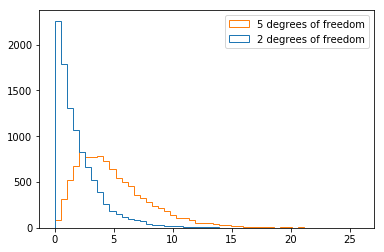

In [33]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df2,chi_squared_df5], bins=50, histtype='step', 
                  label=['2 degrees of freedom','5 degrees of freedom'])
plt.legend(loc='upper right')


# Hypothesis Testing

In [35]:
df = pd.read_csv('grades.csv')

In [36]:
df.head()


,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000


In [37]:
len(df)

2315

In [41]:
early = df[df['assignment1_submission'] <= '2015-12-31']
early.head()
print("blaaaaaaaaa")
late = df[df['assignment1_submission'] > '2015-12-31']
late.head()

blaaaaaaaaa


,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
6,3217BE3F-E4B0-C3B6-9F64-462456819CE4,87.498744,2016-03-05 11:05:25.408000000,69.998995,2016-03-09 07:29:52.405000000,55.999196,2016-03-16 22:31:24.316000000,50.399276,2016-03-18 07:19:26.032000000,45.359349,2016-03-19 10:35:41.869000000,45.359349,2016-03-23 14:02:00.987000000
7,F1CB5AA1-B3DE-5460-FAFF-BE951FD38B5F,80.576090,2016-01-24 18:24:25.619000000,72.518481,2016-01-27 13:37:12.943000000,65.266633,2016-01-30 14:34:36.581000000,65.266633,2016-02-03 22:08:49.002000000,65.266633,2016-02-16 14:22:23.664000000,65.266633,2016-02-18 08:35:04.796000000
9,E2C617C2-4654-622C-AB50-1550C4BE42A0,59.270882,2016-03-06 12:06:26.185000000,59.270882,2016-03-13 02:07:25.289000000,53.343794,2016-03-17 07:30:09.241000000,53.343794,2016-03-20 21:45:56.229000000,42.675035,2016-03-27 15:55:04.414000000,38.407532,2016-03-30 20:33:13.554000000


In [ ]:
early.mean()

In [ ]:
late.mean()

In [43]:
from scipy import stats
stats.ttest_ind?

In [42]:
stats.ttest_ind(early['assignment1_grade'], late['assignment1_grade'])

Ttest_indResult(statistic=1.400549944897566, pvalue=0.16148283016060577)

In [44]:
stats.ttest_ind(early['assignment2_grade'], late['assignment2_grade'])

Ttest_indResult(statistic=1.3239868220912567, pvalue=0.18563824610067967)

In [45]:
stats.ttest_ind(early['assignment3_grade'], late['assignment3_grade'])

Ttest_indResult(statistic=1.7116160037010733, pvalue=0.087101516341556676)